# Detokenization

In [1]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 448 kB 42.3 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 3.40 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-05-17 08:14:20--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c5:2ef4, 2406:da00:ff00::22cd:e0db, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loc

1) tokenizer.sequences_to_texts() 함수를 사용하여 Decoding<br> 2) tokenizer.index_word 를 사용하여 Decoding

두 가지 방법으로 mecab_tensor[100] 을 원문으로 되돌려 보세요! (여기서 띄어쓰기는 고려하지 않습니다!)

## 1. def을 사용하지 않은 경우

--2022-05-17 08:18:28--  https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz [following]
--2022-05-17 08:18:29--  https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8718893 (8.3M) [application/octet-stream]
Saving to: ‘korean-english-park.train.tar.gz’

korean-eng

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


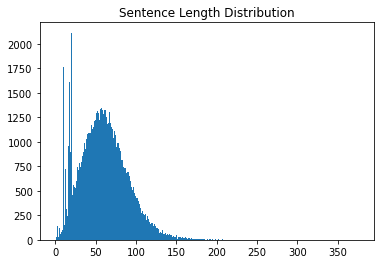

’
Outlier Index :  11
Outlier Index :  19
Outlier Index :  21
문장의 최단 길이 : 1
문장의 최장 길이 : 377
문장의 평균 길이 : 138




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


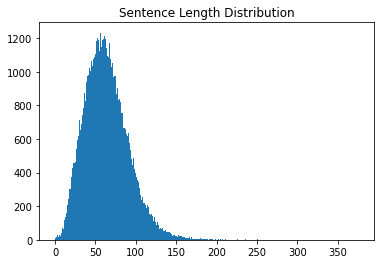

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:99: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


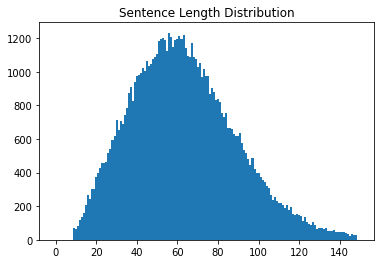

Mecab Voca Size :  52279


In [2]:
import konlpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Mecab
import matplotlib.pyplot as plt

import os
import numpy as np


## 자료 불러오기
!wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz

## 불러온 자료 압축 풀기
!tar -xzvf korean-english-park.train.tar.gz

## 경로 설정 및 자료 불러오기
path_to_file = './korean-english-park.train.ko'

with open(path_to_file, 'r') as f:
    raw = f.read().splitlines()                                                  # raw에 한 문장씩 저장

## 파일 안의 내용 확인
print('Example : ')
for sen in raw[0:100][: : 20]: print('>>', sen)
print('\n')

## 파일 안의 문장 구성 확인
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print('문장의 최단 길이 :', min_len)
print('문장의 최장 길이 :', max_len)
print('문장의 평균 길이 :', sum_len//len(raw))
print('\n')

## 파일 안의 문장을 시각적으로 확인
sentence_length = np.zeros((max_len), dtype = np.int)                            # max의 수 만큼 0을 만들어

for sen in raw:
    sentence_length[len(sen)-1] += 1                                             # 한 인덱스에 적인 문장의 개수만큼 0의 자리에 1을 추가

plt.bar(range(max_len), sentence_length, width = 1.0)
plt.title('Sentence Length Distribution')
plt.show()

## 특정 열에 작성되어 있는 문장을 확인할 코딩을 구성
def check_sentence_with_length(raw, length):
    count = 0

    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)                                               # 문장의 길이가 이상한 것(1 혹은 너무 긴 문장들)을 확인

for idx, _sum in enumerate(sentence_length):
    if _sum > 1500:
        print('Outlier Index : ', idx+1)                                         # 길이가 1500이 넘어가는 문장들의 인덱스를 확인

## 중복되는 문장들을 제거
cleaned_corpus = list(set(raw))                                                  # 중복되는 문장을 제거하는 함수는 set()이며 이것을 리스트의 형태로 묶음

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print('문장의 최단 길이 :', min_len)
print('문장의 최장 길이 :', max_len)
print('문장의 평균 길이 :', sum_len//len(cleaned_corpus)); print('\n')

sentence_length = np.zeros((max_len), dtype=np.int)
for sen in cleaned_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width = 1.0)
plt.title('Sentence Length Distribution')
plt.show()

## 노이즈(index에 들어가지 못할 내용들) 제거
min_len = 10
max_len = 150

filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

## 형태소 기반 토큰화 진행
mecab_corpus = []                                                                # 형태소 기반으로 나눠 저장할 리스트 지정

mecab = Mecab()                                                                  # 형태소 기반 토큰화의 객체화 진행

for kor in filtered_corpus:
    mecab_corpus.append(mecab.morphs(kor))

tokenizer = Tokenizer(filters = '')                                              # tokenizer 객체화
tokenizer.fit_on_texts(mecab_corpus)

tensor = tokenizer.texts_to_sequences(mecab_corpus)
split_mecab_tensor = pad_sequences(tensor, padding='post')

print('Mecab Voca Size : ', len(tokenizer.index_word))

In [31]:
tokenizer = Tokenizer(filters = '')                                              # tokenizer 객체화
filter_tokenizer = tokenizer.fit_on_texts(mecab_corpus)

tensor = tokenizer.texts_to_sequences(mecab_corpus)
split_mecab_tensor = pad_sequences(tensor, padding='post')

print('Mecab Voca Size : ', len(filter_tokenizer.index_word))

AttributeError: ignored

In [11]:
mecab_corpus = []                                                                # 형태소 기반으로 나눠 저장할 리스트 지정

mecab = Mecab()                                                                  # 형태소 기반 토큰화의 객체화 진행

for kor in filtered_corpus:
    mecab_corpus.append(mecab.morphs(kor))

tokenizer = Tokenizer(filters = '')                                              # tokenizer 객체화
tokenizer.fit_on_texts(mecab_corpus)

tensor = tokenizer.texts_to_sequences(mecab_corpus)
split_mecab_tensor = pad_sequences(tensor, padding='post')

print('Mecab Voca Size : ', len(tokenizer.index_word))

Mecab Voca Size :  52279


In [12]:
# print(tensor)
print(tensor[100])

[32455, 116, 899, 913, 196, 899, 240, 2742, 8, 841, 116, 6, 5887, 12273, 15, 914, 14, 6, 224, 5, 573, 99, 17, 689, 1170, 2862, 9, 1172, 242, 12, 13, 23, 34, 11, 2, 1]


In [13]:
print(type(tensor[100]))

<class 'list'>


In [16]:
type([tensor[100]])

list

In [15]:
# Case 1 : mecab_tokenizer.sequences_to_texts()
texts = tokenizer.sequences_to_texts([tensor[100]])                   # 리스트로 넣어주어야 한다. 정확히 말하자면 sequences_to_texts() 함수에는 nparray의 형태(혹은 tensor)로 들어가야 하지만 
                                                                                 # mecab_tensor(즉, nparray 형태)에서 100번째 행을 뽑아내는 순간 mecab_tensor[100]은 1차원 행렬이 된다. 즉, mecab_tensor[100]을 리스트로
                                                                                 #묶어주어 nparray 형태(2차원)으로 만들어 주어야 한다는 말이다.

print(texts[0])                                                                  # [0]을 제외할 경우 리스트의 형태로 출력된다.

현오석 한국 무역 협회 국제 무역 연구 원장 은 어제 한국 의 비싼 생활비 가 외국인 들 의 방문 을 막 아 , 서비스 분야 수지 를 악화 시키 고 있 다고 말 했 다 .


In [18]:
# Case 2 : mecab_tokenizer.index_word[]
# print(mecab_corpus[0])
sentence = ''

for w in tensor[100]:
    if w == 0:
        continue
    sentence += tokenizer.index_word[w] + ' '

print(sentence)

“ 철저 한 검토 를 하 지 않 고 대운하 계획 을 추진 하 는 것 은 , 대중 을 분노 하 게 하 고 사회 적 혼란 만 가중 시킬 것 이 다 ” 라고 이 들 단체 는 성명서 에서 주장 했 다 . 


## 2. def을 진행한 경우

In [6]:
def tokenize(corpus):
    tokenizer = Tokenizer(filters = '')
    tokenizer.fit_on_texts(corpus)
    
    word_index = tokenizer.word_index

    tensor = tokenizer.texts_to_sequences(corpus)                                # 텍스트 -> 시퀀스
    tensor = pad_sequences(tensor, padding = 'post')                             # pre일 경우 0이 앞쪽에 붙는다. 다만, 큰 성능 차이는 존재하지 않는다고 생각하는 것이 좋다

    return tensor, tokenizer

def mecab_split(sentence):
    mecab = Mecab()
    return mecab.morphs(sentence)

In [7]:
mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print("Mecab Vocab Size :", len(mecab_tokenizer.index_word))

Mecab Vocab Size : 52279


In [10]:
print(mecab_tensor[100])

[32455   116   899   913   196   899   240  2742     8   841   116     6
  5887 12273    15   914    14     6   224     5   573    99    17   689
  1170  2862     9  1172   242    12    13    23    34    11     2     1
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0]


In [22]:
print(type(mecab_tensor))

<class 'numpy.ndarray'>


In [23]:
print(type(mecab_tensor[100]))

<class 'numpy.ndarray'>


In [24]:
type([mecab_tensor[100]])

list

In [27]:
# Case 1 : mecab_tokenizer.sequences_to_texts()
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])                   # 리스트로 넣어주어야 한다. 정확히 말하자면 sequences_to_texts() 함수에는 nparray의 형태(혹은 tensor)로 들어가야 하지만 
                                                                                 # mecab_tensor(즉, nparray 형태)에서 100번째 행을 뽑아내는 순간 mecab_tensor[100]은 1차원 행렬이 된다. 즉, mecab_tensor[100]을 리스트로
                                                                                 #묶어주어 nparray 형태(2차원)으로 만들어 주어야 한다는 말이다.

print(texts[0])                                                                  # [0]을 제외할 경우 리스트의 형태로 출력된다.

“ 철저 한 검토 를 하 지 않 고 대운하 계획 을 추진 하 는 것 은 , 대중 을 분노 하 게 하 고 사회 적 혼란 만 가중 시킬 것 이 다 ” 라고 이 들 단체 는 성명서 에서 주장 했 다 .


In [28]:
# Case 2 : mecab_tokenizer.index_word[]
# print(mecab_corpus[0])
sentence = ''

for w in mecab_tensor[100]:
    if w == 0:
        continue
    sentence += mecab_tokenizer.index_word[w] + ' '

print(sentence)

“ 철저 한 검토 를 하 지 않 고 대운하 계획 을 추진 하 는 것 은 , 대중 을 분노 하 게 하 고 사회 적 혼란 만 가중 시킬 것 이 다 ” 라고 이 들 단체 는 성명서 에서 주장 했 다 . 
